In [103]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense


In [104]:
data=pd.read_csv('data.csv')

In [105]:
median_MOER = data['MOER'].median()
data['MOER'] = np.where(data['MOER'] < 750, median_MOER, data['MOER'])

In [162]:
data1=pd.read_csv('data1.csv')
median_MOER1 = data1['MOER'].median()
data1['MOER'] = np.where(data1['MOER'] < 750, median_MOER1, data1['MOER'])

In [ ]:
data

,timestamp,MOER,MOER version,frequency
0,2021-12-01T00:00:00+00:00,950,3,300
1,2021-12-01T00:05:00+00:00,971,3,300
2,2021-12-01T00:10:00+00:00,964,3,300
3,2021-12-01T00:15:00+00:00,968,3,300
4,2021-12-01T00:20:00+00:00,966,3,300
...,...,...,...,...
8923,2021-12-31T23:35:00+00:00,1039,3,300
8924,2021-12-31T23:40:00+00:00,1072,3,300
8925,2021-12-31T23:45:00+00:00,1071,3,300
8926,2021-12-31T23:50:00+00:00,1080,3,300


In [167]:
data_test= data1['MOER']

In [168]:
data_model= data['MOER']

In [4]:
data_model[:10]

0    950
1    971
2    964
3    968
4    966
5    965
6    965
7    961
8    959
9    957
Name: MOER, dtype: int64

In [309]:
def prepare_data(data, n_prev=24):
    X, y = [], []
    for i in range(n_prev, len(data)):
        X.append(data.iloc[i-n_prev:i])
        y.append(data.iloc[i])
    return np.array(X), np.array(y)


In [310]:
train_size = int(len(data) * 0.8)
train_data = data_model.iloc[:train_size]
test_data = data_model.iloc[train_size:]


In [311]:
X_train, y_train = prepare_data(train_data)
X_test, y_test = prepare_data(test_data)


In [297]:
X_train[0]

array([950., 971., 964., 968., 966., 965., 965., 961., 959., 957., 955.,
       953., 952., 959., 943., 941., 951., 952., 956., 957., 959., 963.,
       966., 966.])

In [298]:
y_train[0]

array([966., 965., 962., 961., 960., 959., 959., 961., 961., 961., 963.,
       962., 962., 949., 960., 964., 968., 967., 965., 964., 964., 963.,
       962., 968.])

In [322]:
X_TEST_OVERFIT,Y_TEST_OVERFIT = prepare_data(data_test)


In [325]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(40, activation='linear'))
model.add(Dense(32, activation='relu'))
model.add(Dense(27, activation='linear'))
model.add(Dense(20, activation='linear'))
model.add(Dense(17, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')


In [326]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
201/201 [==============================] - 2s 3ms/step - loss: 19664.7383 - val_loss: 2070.5820
Epoch 2/50
201/201 [==============================] - 0s 2ms/step - loss: 1985.9916 - val_loss: 1086.6753
Epoch 3/50
201/201 [==============================] - 0s 2ms/step - loss: 1415.8014 - val_loss: 1396.3889
Epoch 4/50
201/201 [==============================] - 1s 3ms/step - loss: 1460.8741 - val_loss: 601.8397
Epoch 5/50
201/201 [==============================] - 1s 3ms/step - loss: 1086.0831 - val_loss: 801.3996
Epoch 6/50
201/201 [==============================] - 1s 3ms/step - loss: 1094.2651 - val_loss: 1245.2365
Epoch 7/50
201/201 [==============================] - 0s 2ms/step - loss: 1060.8259 - val_loss: 540.1172
Epoch 8/50
201/201 [==============================] - 1s 3ms/step - loss: 984.0404 - val_loss: 1855.4163
Epoch 9/50
201/201 [==============================] - 2s 8ms/step - loss: 1016.3120 - val_loss: 468.0605
Epoch 10/50
201/201 [=============================

In [327]:
y_pred=model.predict(X_test)

56/56 [==============================] - 0s 1ms/step


In [328]:
Y_PRED_OVERFIT=model.predict(X_TEST_OVERFIT)

279/279 [==============================] - 0s 1ms/step


(100.0, 300.0)

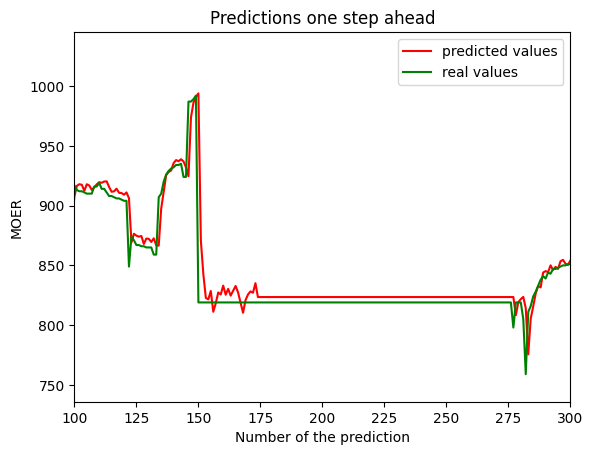

In [329]:
import matplotlib.pyplot as plt
plt.plot(Y_PRED_OVERFIT, color='r',label='predicted values')
plt.plot(Y_TEST_OVERFIT, color='g',label='real values')
plt.xlabel('Number of the prediction')
plt.ylabel('MOER')
plt.legend()
plt.title('Predictions one step ahead')
plt.xlim(100,300)

(0.0, 200.0)

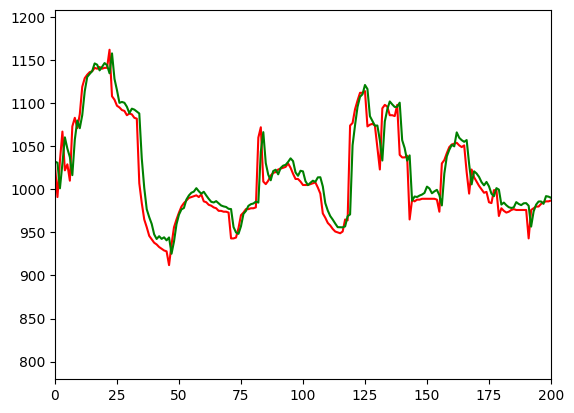

In [330]:
import matplotlib.pyplot as plt
plt.plot(y_test, color='r')
plt.plot(y_pred, color='g')
plt.xlim(0,200)

In [331]:
### PREDICTIONS OF 24 STEPS AHEAD
X_test_long=X_test[100]

y_pred_long = model.predict(X_test_long.reshape(1, -1))[0]

predictions = [y_pred_long]


for i in range(1,24):
    
    X_test_long= np.roll(X_test_long, -1)
    X_test_long[-1] = y_pred_long
    
    
    y_pred_long = model.predict(X_test_long.reshape(1, -1))[0]
    
    
    predictions.append(y_pred_long)


1/1 [==============================] - 0s 18ms/step


In [332]:
predictions = np.array([x[0] for x in predictions])


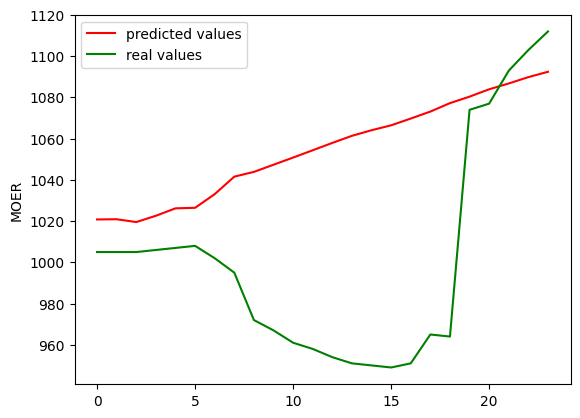

In [334]:
import matplotlib.pyplot as plt
plt.plot(predictions, color='r',label='predicted values')
plt.plot(y_test[100:124], color='g',label='real values')

plt.ylabel('MOER')
plt.legend()


In [ ]:
### lstm

In [348]:
def prepare_data(data, n_prev=24, n_future=24):
    X, y = [], []
    for i in range(n_prev, len(data)-n_future+1):
        X.append(data.iloc[i-n_prev:i])
        y.append(data.iloc[i:i+n_future])
    return np.array(X), np.array(y)

X,y = prepare_data(data_model)

In [374]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten


In [349]:
train_size = int(len(X) * 0.7)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


In [350]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [340]:
X_train.shape

(6246, 4, 1)

In [377]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(LSTM(42, return_sequences=True))
model.add(LSTM(37))
model.add(Dense(32, activation='relu'))
model.add(Dense(24))
model.compile(loss='mse', optimizer='adam')
model.summary()


Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 24, 64)            16896     
                                                                 
 lstm_19 (LSTM)              (None, 24, 42)            17976     
                                                                 
 lstm_20 (LSTM)              (None, 37)                11840     
                                                                 
 dense_164 (Dense)           (None, 32)                1216      
                                                                 
 dense_165 (Dense)           (None, 24)                792       
                                                                 
Total params: 48,720
Trainable params: 48,720
Non-trainable params: 0
_________________________________________________________________


In [378]:
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)


Epoch 1/25
175/175 [==============================] - 13s 43ms/step - loss: 954819.8750 - val_loss: 900807.0000
Epoch 2/25
175/175 [==============================] - 7s 38ms/step - loss: 814234.8750 - val_loss: 699446.2500
Epoch 3/25
175/175 [==============================] - 6s 35ms/step - loss: 578206.0000 - val_loss: 445003.7188
Epoch 4/25
175/175 [==============================] - 6s 36ms/step - loss: 332930.3438 - val_loss: 223418.3594
Epoch 5/25
175/175 [==============================] - 6s 37ms/step - loss: 149627.9844 - val_loss: 84655.0703
Epoch 6/25
175/175 [==============================] - 6s 35ms/step - loss: 51315.9883 - val_loss: 24368.1016
Epoch 7/25
175/175 [==============================] - 7s 37ms/step - loss: 14934.7744 - val_loss: 7010.0327
Epoch 8/25
175/175 [==============================] - 6s 34ms/step - loss: 5871.8599 - val_loss: 3745.4426
Epoch 9/25
175/175 [==============================] - 7s 38ms/step - loss: 4329.3433 - val_loss: 3340.5161
Epoch 10/25
17

In [379]:
y_pred=model.predict(X_test)

84/84 [==============================] - 2s 11ms/step


In [360]:
y_pred

array([[989.5226 , 989.26855, 987.77   , ..., 994.4525 , 995.5172 ,
        994.6223 ],
       [989.5226 , 989.26855, 987.77   , ..., 994.4525 , 995.5172 ,
        994.6223 ],
       [989.5226 , 989.26855, 987.77   , ..., 994.4525 , 995.5172 ,
        994.6223 ],
       ...,
       [989.52264, 989.2686 , 987.7701 , ..., 994.4525 , 995.5172 ,
        994.6223 ],
       [989.52264, 989.2686 , 987.7701 , ..., 994.4525 , 995.5172 ,
        994.6223 ],
       [989.52264, 989.2686 , 987.7701 , ..., 994.4525 , 995.5172 ,
        994.6223 ]], dtype=float32)

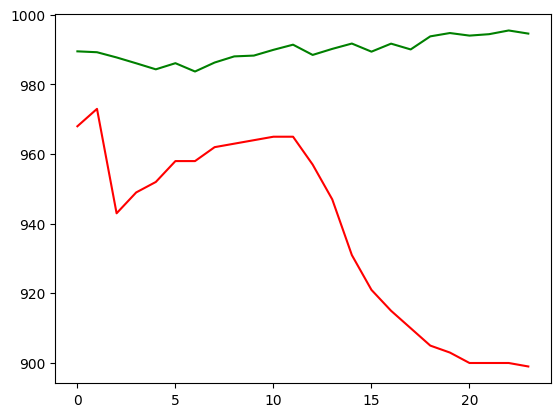

In [361]:
import matplotlib.pyplot as plt
plt.plot(y_test[0], color='r')
plt.plot(y_pred[0], color='g')
plt.show()